In [1]:
import pandas as pd
import yfinance as yf
from bcb import sgs
from bcb import currency
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cotacao_do_dolar = currency.get({"USD": 1 }, start = datetime.datetime(2014, 9, 17), end = datetime.datetime.now())



In [3]:
dados_yahoo_finance = yf.download(['^BVSP', "^GSPC", "SPHD", "GLD", "BTC-USD", "QQQ"], end = "2024-10-01")['Adj Close']

dados_yahoo_finance = dados_yahoo_finance.dropna()




[*********************100%%**********************]  6 of 6 completed


In [4]:
for ativo in dados_yahoo_finance.columns:

    if ativo =="^BVSP":

        pass

    else:

        dados_yahoo_finance[ativo] = dados_yahoo_finance[ativo] * cotacao_do_dolar["USD"]

dados_yahoo_finance.columns = dados_yahoo_finance.columns.str.replace("BTC-USD", "BTC-BRL")



In [5]:
dados_yahoo_finance = dados_yahoo_finance.pct_change().dropna()



In [6]:
dados_indices = pd.read_csv("dados_indices.csv", index_col = "data")
dados_indices.index = pd.to_datetime(dados_indices.index) #transforma data de texto em data


In [7]:
rendimento_cdi = sgs.get({"CDI": 12}, start = datetime.datetime(2014, 9, 18))

rendimento_cdi = rendimento_cdi/100

rendimento_cdi



,CDI
Date,
2014-09-18,0.000407
2014-09-19,0.000407
2014-09-22,0.000407
2014-09-23,0.000408
2014-09-24,0.000408
...,...
2024-11-19,0.000420
2024-11-21,0.000420
2024-11-22,0.000420


In [8]:
todos_dados = dados_yahoo_finance.join(dados_indices)
todos_dados = todos_dados.join(rendimento_cdi)


In [9]:
vol_historica = todos_dados.std() * np.sqrt(252)

vol_historica.sort_values(ascending = False)

BTC-BRL    0.716873
SMLL       0.255093
QQQ        0.249634
^BVSP      0.248089
IDIV       0.237574
^GSPC      0.212047
SPHD       0.204706
GLD        0.199390
IFIX       0.083638
CDI        0.002365
dtype: float64

In [10]:
retorno_acumulado = (1+todos_dados).cumprod() - 1
retorno_acumulado = retorno_acumulado.iloc[-1, :]



In [11]:
investimento_1000_reais = (1 + todos_dados).cumprod() * 1000


In [12]:
#Retorno ao ano

numero_de_dias = len(todos_dados)

retorno_ao_ano = (1+ retorno_acumulado) ** (252/numero_de_dias) - 1



In [13]:
sharpe = retorno_ao_ano/vol_historica



In [14]:
tabela_final = pd.concat([retorno_ao_ano, vol_historica, sharpe], axis = 1)
tabela_final.columns = ["Retorno a.a.", "Volatilidade a.a.", "Indice Sharpe"]
tabela_final.index = ["BITCOIN", "OURO", "QQQ", "DIVIDENDOS US", "IBOVESPA", "SP500", "IFIX", "SMALL CAPS BR", "IDIV", "CDI"]

tabela_final = tabela_final.sort_values("Retorno a.a.", ascending= False)





In [ ]:
df_ajustado = tabela_final.style.format(
    {
        "Retorno a.a.": '{:.2%}',
        "Volatilidade a.a.": '{:.2%}'
    })

df_ajustado

,Retorno a.a.,Volatilidade a.a.,Indice Sharpe
BITCOIN,82.22%,71.69%,1.146892
QQQ,29.89%,24.96%,1.197430
SP500,21.86%,21.20%,1.030876
DIVIDENDOS US,19.64%,20.47%,0.959484
OURO,17.74%,19.94%,0.889810
CDI,9.29%,0.24%,39.267028
IDIV,9.09%,23.76%,0.382760
IFIX,8.78%,8.36%,1.050268
IBOVESPA,8.69%,24.81%,0.350200
SMALL CAPS BR,3.68%,25.51%,0.144255


<Axes: xlabel='Date'>

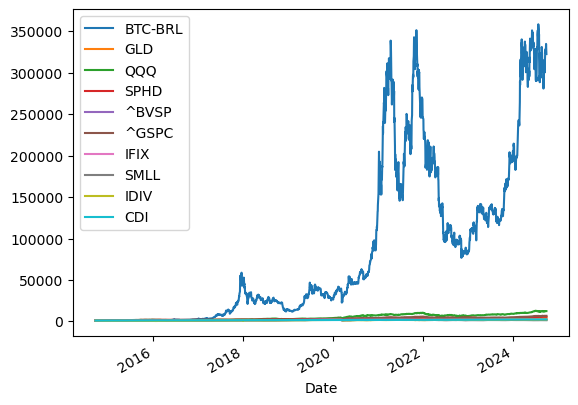

In [16]:
investimento_1000_reais.plot()

<Axes: xlabel='Date'>

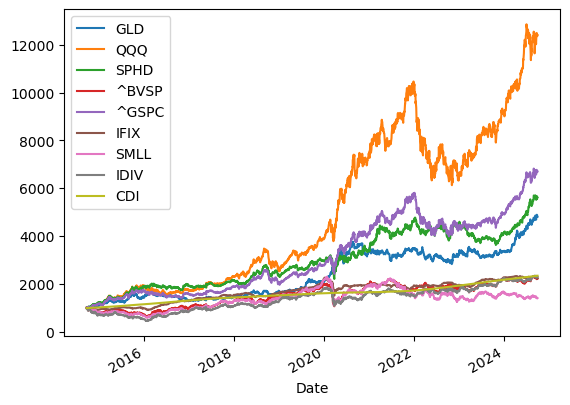

In [ ]:
investimento_1000_reais_exc_btc = investimento_1000_reais.drop("BTC-BRL", axis = 1)
investimento_1000_reais_exc_btc.plot()